In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [6]:
img = cv2.imread("Charjabug.png",cv2.IMREAD_COLOR)
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(1615, 1750, 3)


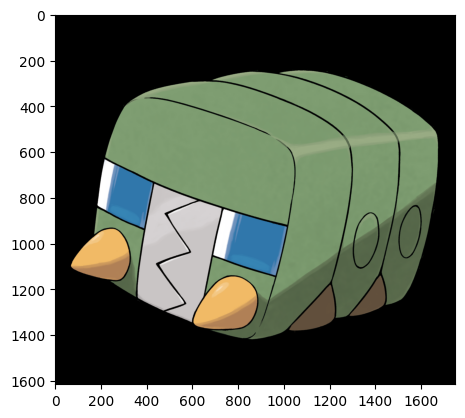

In [7]:
im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.show()

# Problema 1:

In [8]:
def Color(Imagen:'numpy.ndarray',color:int):
    chanel=[0,0,0]
    if color ==1:
        chanel=[1,0,0]
    elif color==2:
        chanel=[0,1,0]
    elif color==3:
        chanel=[0,0,1]
    elif color==10:
        chanel=[0,1,1]
    elif color==20:
        chanel=[1,1,0]
    elif color==30:
        chanel=[1,0,1]
    else:
        return "El número debe ser (1, 2, 3, 10, 20, 30)"
    Img_R=Imagen*chanel
    cv2.imwrite("P1\Resultado.jpg",Img_R)
    return "imagen generada como 'Resultado.jpg' "

In [9]:
Color(img,2)

"imagen generada como 'Resultado.jpg' "

# Problema 2:

In [10]:
def Gray_2_color(R,G,B):
    BGR=np.dstack((B,G,R))
    cv2.imwrite("P2\Colorizada.jpg",BGR)
    RGB=cv2.cvtColor(BGR, cv2.COLOR_BGR2RGB)
    plt.imshow(RGB)
    return "imagen generada como 'Colorizada.jpg' "

"imagen generada como 'Colorizada.jpg' "

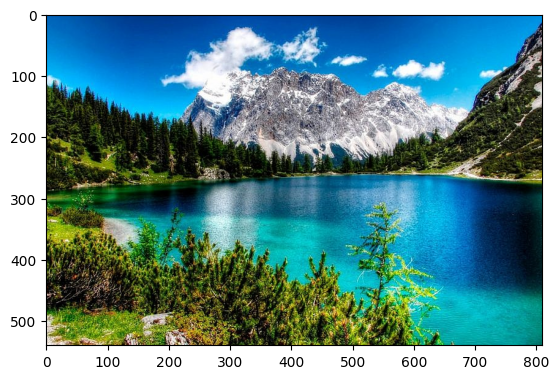

In [11]:
GSR= cv2.imread("imagen1\imagen1_salida_gray_rojo.jpg",cv2.IMREAD_GRAYSCALE)
GSG= cv2.imread("imagen1\imagen1_salida_gray_verde.jpg",cv2.IMREAD_GRAYSCALE)
GSB= cv2.imread("imagen1\imagen1_salida_gray_azul.jpg",cv2.IMREAD_GRAYSCALE)
Gray_2_color(GSR,GSG,GSB)

"imagen generada como 'Colorizada.jpg' "

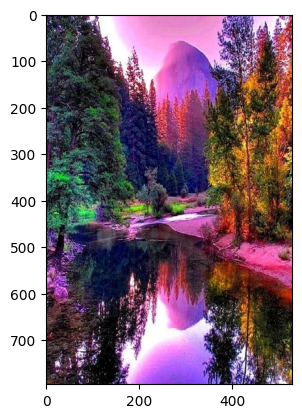

In [12]:
GSR= cv2.imread("imagen2\imagen2_salida_gray_rojo.jpg",cv2.IMREAD_GRAYSCALE)
GSG= cv2.imread("imagen2\imagen2_salida_gray_verde.jpg",cv2.IMREAD_GRAYSCALE)
GSB= cv2.imread("imagen2\imagen2_salida_gray_azul.jpg",cv2.IMREAD_GRAYSCALE)
Gray_2_color(GSR,GSG,GSB)

"imagen generada como 'Colorizada.jpg' "

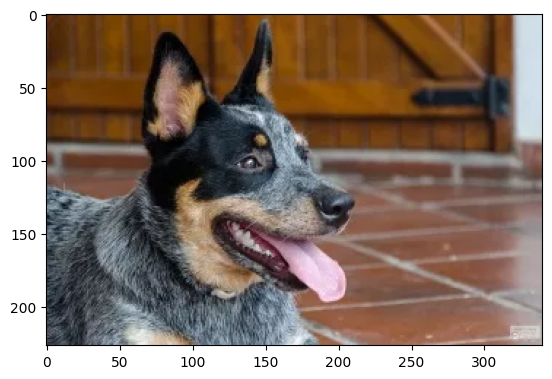

In [13]:
GSR= cv2.imread("imagen3\perro_salida_gray_rojo.jpg",cv2.IMREAD_GRAYSCALE)
GSG= cv2.imread("imagen3\perro_salida_gray_verde.jpg",cv2.IMREAD_GRAYSCALE)
GSB= cv2.imread("imagen3\perro_salida_gray_azul.jpg",cv2.IMREAD_GRAYSCALE)
Gray_2_color(GSR,GSG,GSB)

# Problema 3:

In [20]:
def Color_2_GS(Imagen:'numpy.ndarray'):
    B,G,R=np.split(Imagen,3,axis=-1)
    cv2.imwrite('P3\Canal_rojo.jpg',R)
    cv2.imwrite('P3\Canal_verde.jpg',G)
    cv2.imwrite('P3\Canal_azul.jpg',B)

In [21]:
Color_2_GS(img)

"imagen generada como 'Colorizada.jpg' "

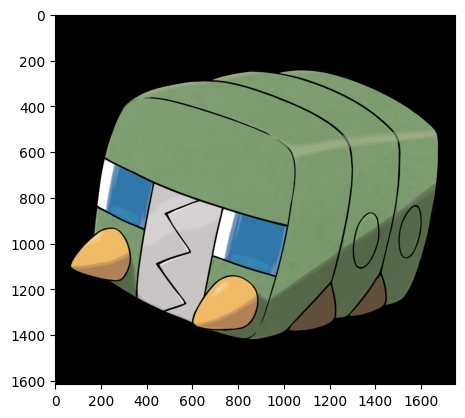

In [16]:
GSR= cv2.imread("P3\Canal_rojo.jpg",cv2.IMREAD_GRAYSCALE)
GSG= cv2.imread("P3\Canal_verde.jpg",cv2.IMREAD_GRAYSCALE)
GSB= cv2.imread("P3\Canal_azul.jpg",cv2.IMREAD_GRAYSCALE)
Gray_2_color(GSR,GSG,GSB)

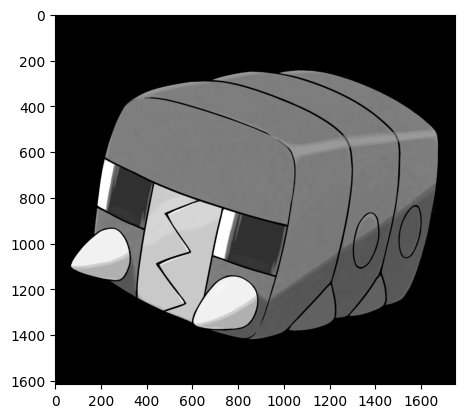

In [22]:
plt.imshow(GSR,cmap='gray')

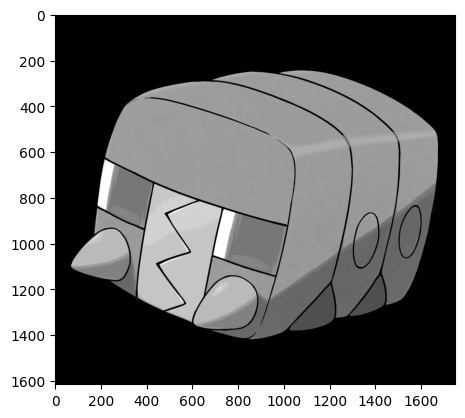

In [23]:
plt.imshow(GSG,cmap='gray')

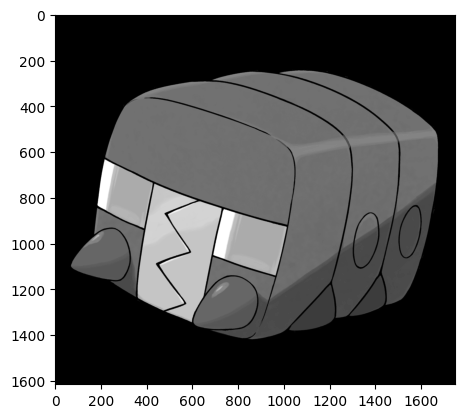

In [24]:
plt.imshow(GSB,cmap='gray')

# Problema 4:

In [66]:
def Hists(Imagen:'numpy.ndarray'):
    global HR, HG, HB, HGr
    H=np.zeros((4,256))
    alto=Imagen.shape[0]
    ancho=Imagen.shape[1]
    for i in range (0, alto):
        for j in range(0, ancho):
            px=Imagen[i,j]
            B=px[0]
            G=px[1]
            R=px[2]
            gray=int(np.mean(px))
            H[0,R]=H[0,R]+1
            H[1,G]=H[1,G]+1
            H[2,B]=H[2,B]+1
            H[3,gray]=H[3,gray]+1
    HR=H[0]
    HG=H[1]
    HB=H[2]
    HGr=H[3]
    plt.plot(HR,color='Red')
    plt.plot(HG,color='Green')
    plt.plot(HB,color='Blue')
    plt.plot(HGr,color='Gray')
    plt.xlabel("Intensidad de Pixel")
    plt.ylabel("Pixeles totales")
    plt.title("Histogramas por canales")
    plt.show
   

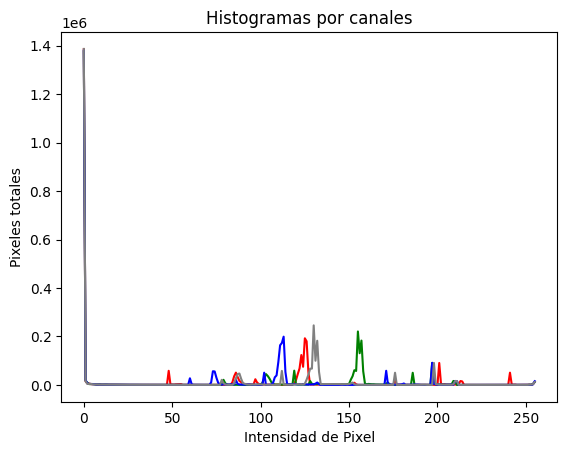

In [67]:
Hists(img)

# Problema 5:

En el modelo de color HSV, un color se define por su tono (H), su saturación (S) y su luminosidad (V), por lo que se parece más a la percepción del color humano que a los modelos de color aditivos y sustractivos.

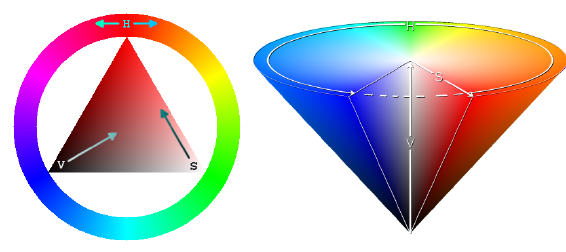

El tono (H) se da como un ángulo en el círculo cromático, por lo tanto, puede alcanzar valores entre 0° y 360°. 0° corresponde al color rojo, 120° corresponde al color verde y 240° corresponde al color azul. La saturación (S) se declara como porcentajes y, por lo tanto, puede alcanzar valores entre 0% y 100% (o 0 a 1). Una saturación del 100% significa un color completamente saturado y puro, cuanto menor es la saturación, más se vuelve el color a un gris neutro. El valor de luminosidad o negrura (V) también se da como un porcentaje, donde 0% significa que no hay brillo (por lo tanto, negro) y 100% de brillo total, por lo tanto, un espectro entre el color puro (saturación del 100%) y el blanco (saturación de 0 %)

Si ambos, la saturación y la luminosidad son 100%, se obtiene un color puro. Si la saturación es 0% y la luminosidad es 100%, es blanca y para todos los casos en que la luminosidad es 0%, es negra.